# 신경망 학습
---

## 데이터 주도 학습
---

> 신경망의 특징은 데이터를 보고 학습하는 것
>> 데이터에서 학습 : 가중치 매개변수 값을 데이터로 보고 자동으로 결정한다는 의미
>
> 알고리즘을 밑바닥부터 설계하는 대신 입력 데이터에서 본질적이고 주용한 데이터를 정확하게 추출할 수 있는 변환기
>
> 1. 이미지 데이터의 특징을 백터로 변환
>> CV 분야에서는 SIFT, SURF, HOG등의 특징을 주로 사용
>
> 2. 변환된 백터를 가지고 학습
>> 지도 학습 방식의 대표 분류인 SVM, KNN등으로 학습
>
> <br>
> <br>
> 
> 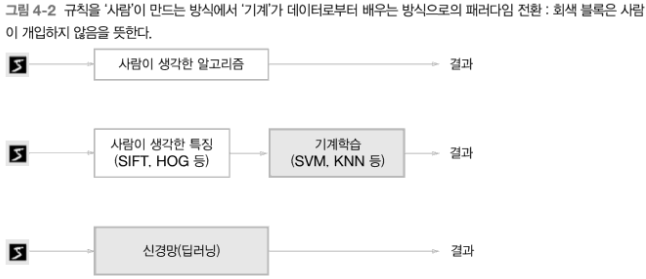
>
> (회색 블록은 사람이 개입 X)
>
> 위 그림처럼 신경망은 이미지를 그대로 학습
>
> 두 번째 접근 방식(특징, 기계학습)과 달리 이미지에 포함된 중요한 특징까지 기계가 스스로 학습
>> 신경망은 모든 문제를 같은 맥락에서 풀 수 있다는 장점
>> 
>> 신경망은 모든 문제를 주어진 데이터 그대로 입력 데이터로 활용해 'END-TO-END'로 학습

## 훈련/시험 데이터(train/test data)
---

> 기계학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나눠서 학습과 실험을 수행
>> 훈련 데이터 : 학습하면서 최적의 매개변수를 찾음
>>
>> 시험 데이터 : 앞서 훈련한 모델의 실력을 평가
>
> <br>
>
> 분리하는 이유
>> 범용적으로 사용할 수 있는 모델을 판단하기 위해 범용 능력을 알기 위해
>
> <br>
>
> 
> 만약 둘 중 한 데이터셋만 지나치게 최적화되면 overfitting이라 부름

## 손실 함수(Loss Function)
---

> 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현
>
> 이 지표를 가장 좋게 만들어주는 가중치 매개변수 값을 탐색하는 것
>> '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색하는데, 신경만 학습에서 사용하는 지표가 '손실 함수'
>>> 손실 함수 : 신경만 성능의 나쁨을 나타내는 지표

<br>
<br>
<br>

### 1. 오차제곱합(SSE, Sum of Squares for Error)
---

> 가장 많이 사용되는 손실 함수
>
> 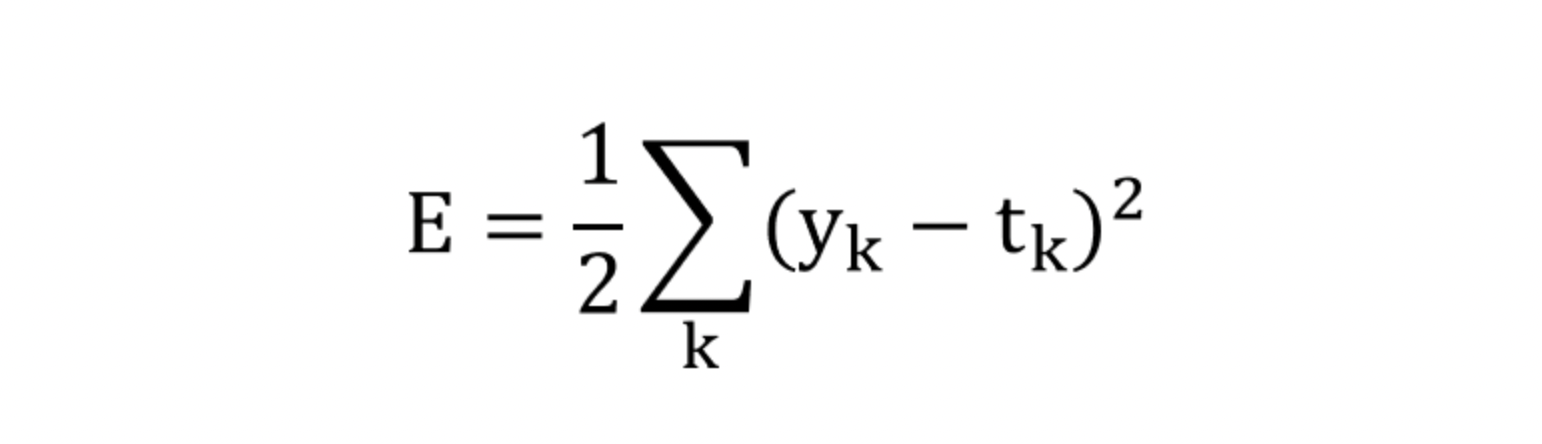
>
> y_k : 신경망의 출력(신경망이 추정한 값)
>
> t_k : 정답 레이블(one-hot encoding)
>
> k : 데이터의 차원 수
>> 각 원소의 출력(추정 값)과 정답 레이블(정답 값)의 차를 제곱한 후, 총합

In [1]:
# 오차제곱합 구현
import numpy as np

y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

print(sum_squares_error(np.array(y), np.array(t))) # 주어진 예측값 y와 실제값 t 사이의 오차제곱합

0.09750000000000003


### 2. 교차 엔트로피 오차(cross entropy error)
---

> 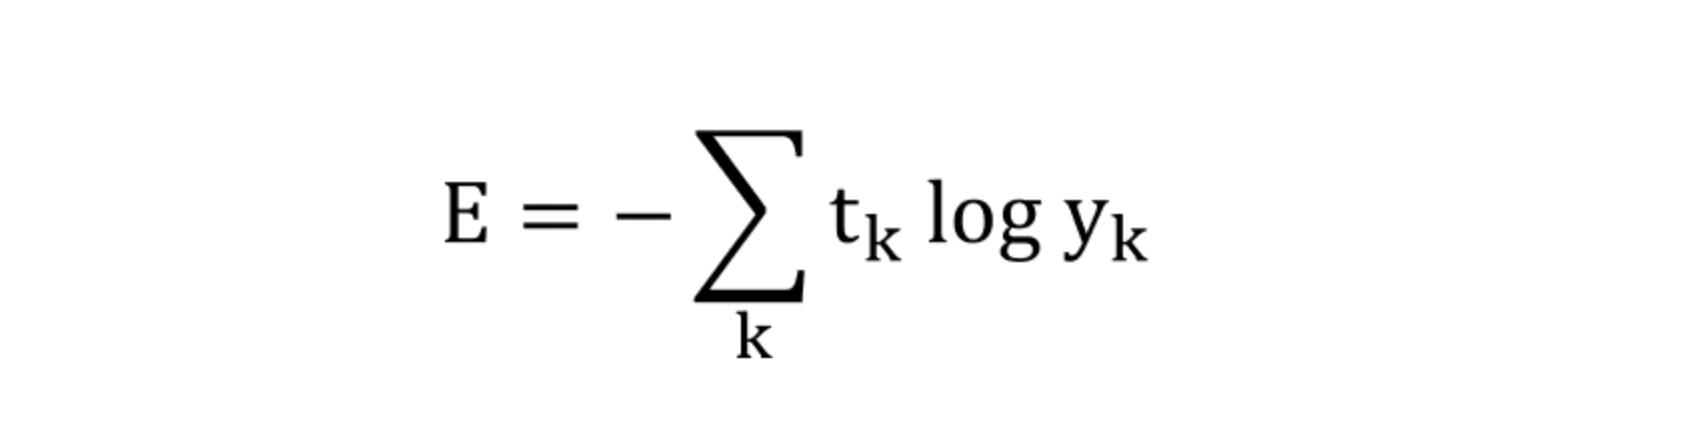
>
> log : 밑이 e인 자연로그
> y_k : 신경망의 출력
> t_k : 정답 레이블
>> t는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 -> one-hot encoding)

In [6]:
# 교차 엔트로피
import numpy as np

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.06,0.1,0.0,0.1,0.0,0.0]
z = [0.1,0.05,0.1,0.0,0.06,0.1,0.0,0.6,0.0,0.0]

def cross_entropy_error(y, t):
    delta = 1e-7 #  np.log()에 0을 입력하면 -inf 방지하기 위해 아주 작은 값 입력
    return -np.sum(t*np.log(y+delta))

print(cross_entropy_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(z), np.array(t)))

0.510825457099338
2.302584092994546


### 3. 미니배치 학습
---

> 기계 학습은 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.
>
> 이렇게 하기 위해서는 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야함
>
> 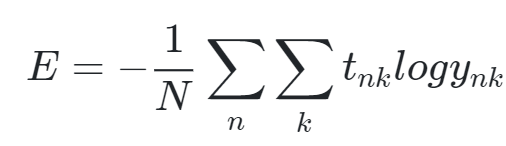
>
> 2. 에서는 데이터 하나에 대한 손실 함수를 구했지만,
>
> 위 식은 N개의 데이터로 확장 후 마지막에 N으로 나눠 평균 손실 함수를 구하는 것
>
> 하지만 빅데이터 수준에서는 N이 매우 거대한 값이 되므로 데이터 중 일부를 추려 전체의 근사치로 활용
>
> 이러한 일부를 미니배치라 칭함

In [24]:
# 미니배치
import sys, os

sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_text) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) ## x_train에서 10개의 데이터만 랜덤으로 추출

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

print(np.random.choice(60000,10))

(60000, 784)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[36782 51153 18570  4182 49362 31069 48586 42337  2453 10855]


In [16]:
# 배치용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# y : 신경망의 출력
# t : 정답 레이블
# y가 1차원인 경우, 데이터가 하나당 교차 엔트로피 오차를 구하는 경우 reshape 함수로 데이터 형상을 변환
## 여러 데이터를 한 번에 처리하기 위해 1차원 배열(백터)를 2차원 형태로 데이터 형상을 변환
# 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산

In [35]:
# 정답 레이블이 원-핫 아닌 숫자 레이블인 경우
def cross_entropy_error2(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch

### 손실 함수 설정 이유
---

> 매개변수를 찾는 이유는 '정확도' 때문인데 왜 '손실 함수의 값'이라는 방법을 사용하게 되었을까
>
> 신경만 학습에서는 최적의 매개변수(가중치와 편향)을 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
>
>> 이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
>
> 가중치 매개변수의 손실 함수의 미분이란, 가중치 매개변수의 값을 아주 조금 변화시켰을때, 손실 함수가 어떻게 변하는가 의미
>> 미분 값이 음수 시 : 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
>>
>> 미분 값이 양수 시 : 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
>>
>> 미분 값이 0일 시 : 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않음
>>> 가중치 매개변수 갱싱 종료
>
> 신경망 학습에서는 매개변수의 미분 값이 대부분 장소에서 0이 되거 때문에 정확도를 지표로 삼으면 안됌
>> 이유는 정확도는 매개변수의 미소한 변화에는 거의 반응이 없고 반응을 하더라도 그 값이 불연속적으로 변화하기 때문
>>
>> 이러한 현상은 계단 함수를 활성화 함수로 사용하지 않는 이유와도 동일
>>
> <br>
> <br>
>
>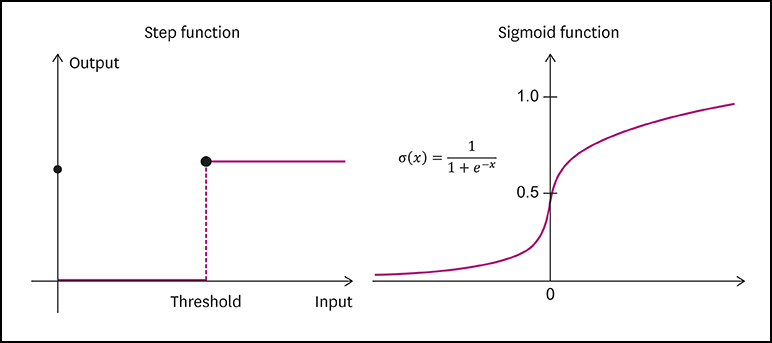
>
> 계단 함수의 미분은 대부분의 장소에서 0의 값을 갖고 있음
>
> 이는 매개변수의 작은 변화가 주는 파장의 계단 함수가 손실 함수의 값에는 아무런 변화를 일으키지 않게 함
>
> 반면 시그모이드 함수의 미분은 어느 장소라도 0이 되지 않아 신경망이 올바르게 학습 가능하도록 해줌

## 수치 미분
---

> ### 미분
> ---
> 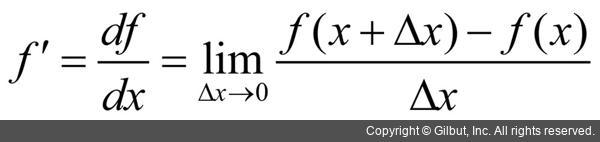
>
> 특정 순간의 변화량을 의미
>
> x의 작은 변화가 f(x)를 얼마나 변화시키는지를 의미
>
> lim_h -> 0은 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미
> 

In [36]:
# 잘못된 미분 계산 구현
def numberical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

### 위 미분 계산 구현의 문제점
---

> 1. 반올림 오차
>> 작은 값이 생략되어 최정 계산 결과에 오차 발생
>
> 2. 함수 f의 차분(임의의 두 점에서의 함수 갑들의 차이) 오차
>
>  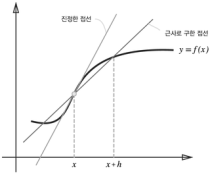
> 
>> 진정한 미분은 x 위치의 함수의 기울기지만, 이 구현에서는 미분은(x+h)와 x사이의 기울기
>> 이 차이는 h를 무한히 0으로 좁히는 것이 불가능

In [37]:
# 개선된 미분 계산 구현
def numberical_deff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h) 

### 편미분
---

> 변수가 여러 개인 함수에 대한 미분
>> 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함
>>
>> 단 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정시킴

In [40]:
# 인수들의 제곱 합을 계산하는 식
def function_2(x):
    return x[0]**2 + x[1]**2

# 기울기
---

> 모든 변수의 편미분을 백터로 정의 한 것
>
> 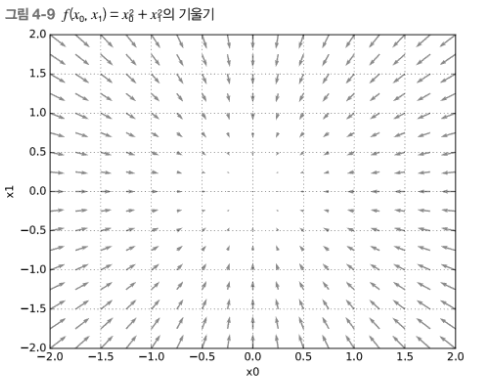
>
> 기울기의 결과에 마이너스를 붙인 백터의 그림
>
> 기울기는 각 지점에서 낮아지는 방향을 가르킴, 기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향으로 판단 가능

In [53]:
import numpy as np

# 기울기 구하는 함수
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]

        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # 기울기 계산
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        # 원래 값 복원
        x[idx] = tmp_val
        it.iternext()

    return grad

# 테스트
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


# 경사법(경사 하강법)
---

> 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아냄
>> 최적 : 손실 함수가 최솟값이 될 때의 매개변수 값
>
<br>

> ### 경사법
>> 기울기를 잘 이용해 함수의 최솟값(또는 가능한 작은 값)을 찾는 것
>
> 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값은 아님
>
> 기울어진 방향이 무조건 최솟값은 아니지만, 그 방향으로 이동해야 함수의 값을 줄일 수 있음
>> 최솟값이 되는 장소를 찾는 문제는 기울기 정보를 단서로 나아갈 방향을 정함
>
> <br>
>
> 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 이동한 곳에서 기울기를 구해 또 기울어진 방향으로 이동하는 과정을 반복하여 함수의 값을 점차 줄이는 것을 경사법이라 칭함

<br>

> 수식
> 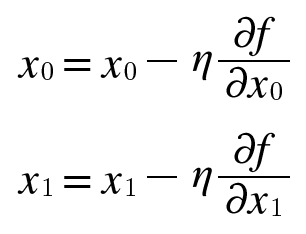
>
> ŋ(eta) : 갱신 양 -> 신경망 학습에서는 학습률을 의미, 위 식을 계속 반복하여 서서히 함수의 값을 줄임
>> 학습률 : 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 멀마나 갱싱하는지 정하는 것

In [46]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grap = numerical_gradient(f, x)
        x -= lr* grad
    return x

# f: 최적화하려는 함수
# init_x : 초깃값
# lr : 학습률
# step_num : 경사법에 따른 반복 횟수

## 신경망에서의 기울기
---

> 신경망에서 기울기는 '가중치 매개변수에 대한 손실 함수의 기울기'를 의미
>
> 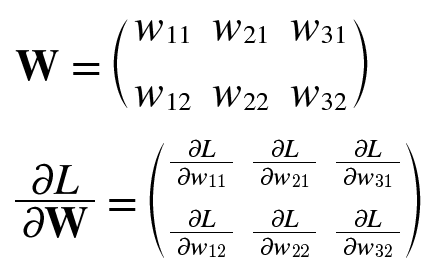
>
> 예로 형상이 2x3, 가중치가 W, 손실 함수가 L인 신경망이 존재할 때
>
> 경사는 aL / aW

In [65]:
import numpy as np

# 소프트맥스 함수
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # 오버플로우 방지
    return exp_x / np.sum(exp_x)

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        return cross_entropy_error(y, t)

# 입력 데이터 및 정답 레이블
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

# 신경망 객체 생성
net = simpleNet()

# 수치 미분을 적용한 손실 함수의 기울기 계산
f = lambda W: net.loss(x, t)

# new.W -> self.W의 랜덤함 2x3 크기의 가중치 행렬을 받아옴
# dW : 손실 함수 loss(x, t)를 가중치 W에 대해 수치 미분 한 값, 즉 손실이 가장 줄어드는 기울기
dW = numerical_gradient(f, net.W) 

print(dW)

[[ 0.11638014  0.36143366 -0.47781379]
 [ 0.1745702   0.54215048 -0.71672069]]


# 학습 알고리즘 구현하기
----